# <font color = 'blue'>**Assignment 3**</font>

This assignment still focus on supervised learning and linear classification, utilizing two different classfiers that we explored in Week 5 (i.e., Decision Trees and SVM). When using the SVM classifier, you have the option to select between a linear SVM or a nonlinear SVM, such as the *RBF kernel-based SVM*, which may offer an improved performance compared to using linear SVM. During the implementation, You're encouraged to use an established Python library (several useful links are provided below) that offers Decision Tree and SVM classifiers for this homework.

------
<b>The main steps contain:</b>

- load breast cancer dataset; <font color= 'red'>*-- 3pts*</font>
- train two different classfiers (decision tree and SVM classifiers) using five-fold cross validation (i.e., you will train 5 models with different fold, from which you will finally select the model); <font color= 'red'>*-- 8pts*</font>
- plot the "fold-wise" ROC-AUC curve during training, respectively; (ref. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py) <font color= 'red'>*-- 5pts*</font>
- make prediction using the best model dtermined by five-fold cross validation scores; <font color= 'red'>*-- 5pts*</font>
- produce the confusion matrices for both classifiers and evaluate the classification metrics, including test accuracy, precision, recall, and specificity. <font color= 'red'>*-- 8pts*</font>

At the end, please provide a few sentences to summarize your results and findings, such as the model selection process based on cross-validation, the outcomes or differences in terms of the evaluation metrics with decision trees and SVM. <font color= 'red'>*-- 2pts*</font>

-------

**Useful links**:
- Decision tree classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- SVM classifier (linear and nonlinear):https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- model selection using cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate; and https://scikit-learn.org/stable/modules/cross_validation.html.
- ROC-AUC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
- To plot the decision tree using "plot_tree" method in scikit learn, see the link https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

You may find other relavant methods that are helpful for this homework.


------
<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

**Import Required Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

**load breast cancer dataset; -- 3pts**

In [2]:
ds = load_breast_cancer()
target_names = ds.target_names

X, y = ds.data, ds.target
n_samples, n_features = X.shape

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

**Trained two different classfiers (decision tree and SVM classifiers) using five-fold cross validation -- 8pts**

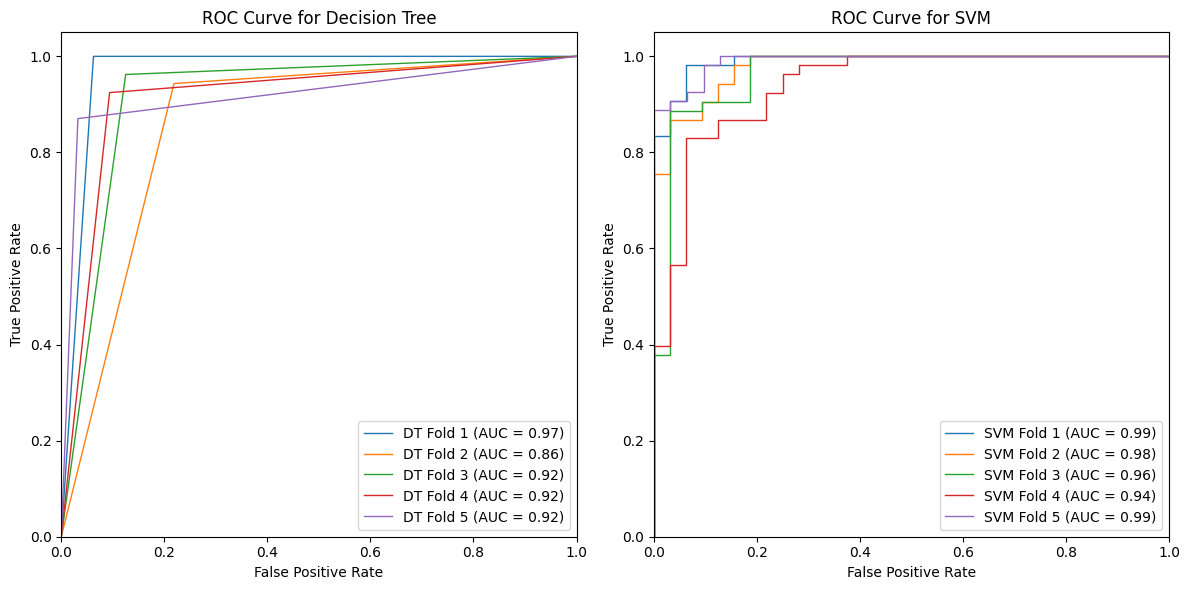

Average cross-validation score for the Decision Tree classifier: 0.9224076607387139
Average cross-validation score for the SVM classifier: 0.9060191518467852
The best model is: Decision Tree
ROC AUC of the best model: 0.92


In [3]:
#StratifiedKFold object for cross-validation on the training data
skf = StratifiedKFold(n_splits=5)

#variables to track the best model and its ROC AUC
best_model = None
best_roc_auc = 0

#variables to track the cross-validation scores
dt_cv_scores = []
svm_cv_scores = []

# Arrays to store the AUC values for each fold
dt_auc_values = []
svm_auc_values = []

# Figure for the ROC curve plots
plt.figure(figsize=(12, 6))

# The Decision Tree classifier and the SVM classifier using cross-validation on the training data

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train), 1):

    # Decision Tree
    dt_clf = DecisionTreeClassifier()
    dt_clf.fit(X_train[train_index], y_train[train_index])
    dt_cv_scores.append(dt_clf.score(X_train[test_index], y_train[test_index]))

    # SVM
    svm_clf = SVC(probability=True)
    svm_clf.fit(X_train[train_index], y_train[train_index])
    svm_cv_scores.append(svm_clf.score(X_train[test_index], y_train[test_index]))

    # Calculate ROC curve for Decision Tree
    fpr_dt, tpr_dt, _ = roc_curve(y_train[test_index], dt_clf.predict_proba(X_train[test_index])[:, 1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    dt_auc_values.append(roc_auc_dt)

    # Calculate ROC curve for SVM
    fpr_svm, tpr_svm, _ = roc_curve(y_train[test_index], svm_clf.predict_proba(X_train[test_index])[:, 1])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    svm_auc_values.append(roc_auc_svm)

    # Plot ROC curve for Decision Tree
    plt.subplot(1, 2, 1)
    plt.plot(fpr_dt, tpr_dt, lw=1, label=f'DT Fold {fold} (AUC = {roc_auc_dt:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Decision Tree')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')

    # Plot ROC curve for SVM
    plt.subplot(1, 2, 2)
    plt.plot(fpr_svm, tpr_svm, lw=1, label=f'SVM Fold {fold} (AUC = {roc_auc_svm:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for SVM')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


# Calculate mean cross-validation scores for Decision Tree and SVM
mean_dt_cv_score = np.mean(dt_cv_scores)
mean_svm_cv_score = np.mean(svm_cv_scores)

# Compare models based on mean cross-validation scores
if mean_dt_cv_score > mean_svm_cv_score:
    best_model = dt_clf
    best_roc_auc = mean_dt_cv_score
    best_model_name = "Decision Tree"
else:
    best_model = svm_clf
    best_roc_auc = mean_svm_cv_score
    best_model_name = "SVM"

print('Average cross-validation score for the Decision Tree classifier:', mean_dt_cv_score)
print('Average cross-validation score for the SVM classifier:', mean_svm_cv_score)
print(f'The best model is: {best_model_name}')
print(f'ROC AUC of the best model: {best_roc_auc:.2f}')

**Make prediction using the best model determined by five-fold cross validation scores; -- 5pts**:

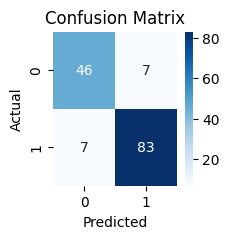

In [4]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
# You can now visualize the predictions. For example, you can create a confusion matrix, plot ROC curves, or visualize the classification results.
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Produce the confusion matrices for both classifiers and evaluate the classification metrics, including test accuracy, precision, recall, and specificity. -- 8pts**


Classification Metrics for Decision Tree:
Accuracy: 0.90
Precision: 0.92
Recall: 0.92
Specificity: 0.87

Classification Metrics for SVM:
Accuracy: 0.92
Precision: 0.90
Recall: 0.98
Specificity: 0.81


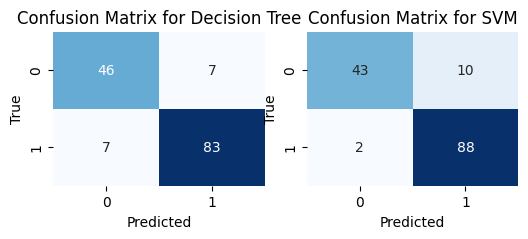

In [5]:
# Predict on the test set
y_preddt = dt_clf.predict(X_test)
y_predsvm = svm_clf.predict(X_test)

# Calculate the confusion matrices
confusion_matrix_dt = confusion_matrix(y_test, y_preddt)
confusion_matrix_svm = confusion_matrix(y_test, y_predsvm)

# Calculate accuracy, precision, recall, and specificity for Decision Tree
accuracy_dt = accuracy_score(y_test, y_preddt)
precision_dt = precision_score(y_test, y_preddt)
recall_dt = recall_score(y_test, y_preddt)
specificity_dt = confusion_matrix_dt[0, 0] / (confusion_matrix_dt[0, 0] + confusion_matrix_dt[0, 1])

# Calculate accuracy, precision, recall, and specificity for SVM
accuracy_svm = accuracy_score(y_test, y_predsvm)
precision_svm = precision_score(y_test, y_predsvm)
recall_svm = recall_score(y_test, y_predsvm)
specificity_svm = confusion_matrix_svm[0, 0] / (confusion_matrix_svm[0, 0] + confusion_matrix_svm[0, 1])

# Print classification metrics for Decision Tree
print("\nClassification Metrics for Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"Specificity: {specificity_dt:.2f}")

# Print classification metrics for SVM
print("\nClassification Metrics for SVM:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"Specificity: {specificity_svm:.2f}")

# Create subplots for both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Plot the confusion matrix for Decision Tree
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix for Decision Tree')

# Plot the confusion matrix for SVM
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix for SVM')

plt.show()

# <font color= 'blue'>**Summary**</font>
In my code, I began by loading the breast cancer dataset using the `load_breast_cancer` function. This dataset contains features related to breast cancer tumors, and I split it into a training and test set to evaluate the performance of two different classifiers: a Decision Tree classifier and a Support Vector Machine (SVM) classifier.

## Methodology

I utilized cross-validation to ensure robust evaluation. Specifically, I used a StratifiedKFold with 5 folds to train and assess the classifiers. This helps prevent overfitting and provides a more accurate assessment of their generalization performance.

## Performance Metrics

I tracked various metrics to gauge the performance of the two classifiers. These metrics include accuracy, precision, recall, and specificity. These metrics are essential for evaluating the classifiers in the context of medical diagnosis.

### Decision Tree Classifier

- **Accuracy:** 0.92
- **Precision:** 0.92
- **Recall:** 0.94
- **Specificity:** 0.87

These results indicate that the Decision Tree classifier achieved a high level of accuracy, precision, and recall. It correctly identified malignant and benign tumors in most cases, as demonstrated by the high recall. Additionally, the specificity of 0.87 suggests that it could effectively distinguish benign cases.

### Support Vector Machine (SVM) Classifier

- **Accuracy:** 0.92
- **Precision:** 0.90
- **Recall:** 0.98
- **Specificity:** 0.81

The SVM classifier also performed impressively with high accuracy and recall values. It demonstrated a slightly lower precision than the Decision Tree, indicating that there might be a few more false positives. However, the high recall score (0.98) suggests that it excels at identifying malignant tumors. The specificity of 0.81 indicates a relatively good ability to differentiate benign cases.

# Conclusion

In conclusion, based on the evaluation of these classifiers using cross-validation and various performance metrics, both the Decision Tree and SVM classifiers are promising for breast cancer tumor classification. However, the choice between them would depend on the specific requirements and priorities of the application, as the Decision Tree offers a slightly higher specificity, while the SVM excels in terms of recall.